# A stepwise animation for the visualization of the Fourier transform - how magnitde and phase are encoded and how ortogonality plays out

Here we just start with getting the releveant packages

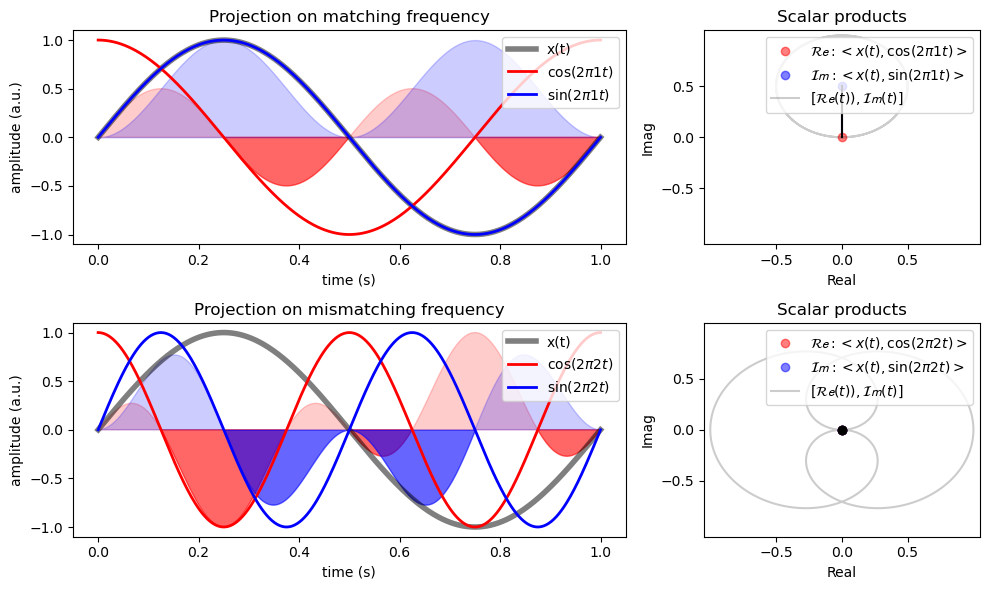

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# some functions
def update(p):
    # update the reference plot
    ref = np.sin(wref*t + p)
    line1.set_ydata(ref)
    line2.set_ydata(ref)
    # update the polar plot
    l1_re.set_xdata([np.sum(ref*cos_w1)/len(t)])
    l1_im.set_ydata([np.sum(ref*sin_w1)/len(t)])
    l1_ma.set_xdata([0, np.sum(ref*cos_w1)/len(t)])
    l1_ma.set_ydata([0, np.sum(ref*sin_w1)/len(t)])
    # update the fillings of the projections
    axs[0, 0].collections.clear()
    axs[0, 0].fill_between(t, ref*cos_w1, where=(ref*cos_w1 > 0), color='red', alpha=.2)
    axs[0, 0].fill_between(t, ref*cos_w1, where=(ref*cos_w1 < 0), color='red', alpha=.6)
    axs[0, 0].fill_between(t, ref*sin_w1, where=(ref*sin_w1 > 0), color='blue', alpha=.2)
    axs[0, 0].fill_between(t, ref*sin_w1, where=(ref*sin_w1 < 0), color='blue', alpha=.6)
    axs[1, 0].collections.clear()
    axs[1, 0].fill_between(t, ref*cos_w2, where=(ref*cos_w2 > 0), color='red', alpha=.2)
    axs[1, 0].fill_between(t, ref*cos_w2, where=(ref*cos_w2 < 0), color='red', alpha=.6)
    axs[1, 0].fill_between(t, ref*sin_w2, where=(ref*sin_w2 > 0), color='blue', alpha=.2)
    axs[1, 0].fill_between(t, ref*sin_w2, where=(ref*sin_w2 < 0), color='blue', alpha=.6)
    #update the trajectories
    l1_tr.set_xdata(ref*cos_w1)
    l1_tr.set_ydata(ref*sin_w1)
    l2_tr.set_xdata(ref*cos_w2)
    l2_tr.set_ydata(ref*sin_w2)
    l1_re_l.set_xdata([0, np.sum(ref*cos_w1)/len(t)])
    l1_im_l.set_ydata([0, np.sum(ref*sin_w1)/len(t)])
    return line1, line2, l1_re, l1_im, l1_tr, l1_re_l, l1_im_l,


# Generate data
t = np.linspace(0, 1, 400)

# Two frequencies and "reference" frequency
w1 = 2*np.pi*1
w2 = 2*np.pi*2

wref = 2*np.pi*1

# Create the corresponding mapping functions
sin_w1 = np.sin(w1*t)
cos_w1 = np.cos(w1*t)

sin_w2 = np.sin(w2*t)
cos_w2 = np.cos(w2*t)

# Now create the reference signal and the initial projections 
ref = np.sin(wref*t)

re_1 = np.sum(ref*cos_w1)/len(t)
im_1 = np.sum(ref*sin_w1)/len(t)
re_2 = np.sum(ref*cos_w2)/len(t)
im_2 = np.sum(ref*sin_w2)/len(t)

# Create the initial plot
## Create a figure with 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [2, 1]})

## Plot sinusoid on the first subplot (top-left)
line1, = axs[0, 0].plot(t, ref, linewidth=4, alpha=.5, color='black', label='x(t)')
# projection of real part
w1_cos, = axs[0, 0].plot(t, cos_w1, linewidth=2, alpha=1, color='red', label=r'$\cos (2\pi 1t)$')
# fill under the curve
w1_cos_pfill = axs[0, 0].fill_between(t, ref*cos_w1, where=(ref*cos_w1 > 0), color='red', alpha=.2)
w1_cos_nfill = axs[0, 0].fill_between(t, ref*cos_w1, where=(ref*cos_w1 < 0), color='red', alpha=.6)
# projection of imaginary part
w1_sin, = axs[0, 0].plot(t, sin_w1, linewidth=2, alpha=1, color='blue', label=r'$\sin (2\pi 1t)$')
# fill under the curve
w1_sin_pfill = axs[0, 0].fill_between(t, ref*sin_w1, where=(ref*sin_w1 > 0), color='blue', alpha=.2)
w1_sin_nfill = axs[0, 0].fill_between(t, ref*sin_w1, where=(ref*sin_w1 < 0), color='blue', alpha=.6)
axs[0, 0].set_title('Projection on matching frequency')
axs[0, 0].set_xlabel('time (s)')
axs[0, 0].set_ylabel('amplitude (a.u.)')
axs[0, 0].legend(loc='upper right')

## Plot cosine on the second subplot (top-right)
l1_re, = axs[0, 1].plot([re_1], [0],'o', alpha = .5, color='red', label=r'$\mathcal{Re}: <x(t), \cos (2\pi 1 t)>$')
l1_re_l, = axs[0, 1].plot([0, re_1], [0, 0], alpha= .5, color='red')
l1_im, = axs[0, 1].plot([0], [im_1],'o', alpha = .5, color='blue', label=r'$\mathcal{Im}: <x(t), \sin (2\pi 1 t)>$')
l1_im_l, = axs[0, 1].plot([0, 0], [0, im_1], alpha= .5, color='blue')
l1_ma, = axs[0, 1].plot([0, re_1], [0, im_1], '-', color="black")
# draw the trajectory in phase space
l1_tr, = axs[0, 1].plot(ref*cos_w1, ref*sin_w1, color='black', alpha=.2, label=r'$[\mathcal{Re}(t)), \mathcal{Im}(t)]$')
axs[0, 1].set_title('Scalar products')
axs[0, 1].set_xlim(-1.05, 1.05)
axs[0, 1].set_ylim(-1.05, 1.05)
axs[0, 1].set_xticks([-.5, 0, .5])
axs[0, 1].set_yticks([-.5, 0, .5])
axs[0, 1].set_xlabel('Real')
axs[0, 1].set_ylabel('Imag')
axs[0, 1].legend(loc='upper right')



## Plot sinusoid on the third subplot (bottom-left)
line2, = axs[1, 0].plot(t, ref, linewidth=4, alpha=.5, color='black', label='x(t)')
# real part
w2_cos, = axs[1, 0].plot(t, cos_w2, linewidth=2, alpha=1, color='red', label=r'$\cos (2\pi 2t)$')
# fill under the curve
w2_cos_pfill = axs[1, 0].fill_between(t, ref*cos_w2, where=(ref*cos_w2 > 0), color='red', alpha=.2)
w2_cos_nfill = axs[1, 0].fill_between(t, ref*cos_w2, where=(ref*cos_w2 < 0), color='red', alpha=.6)
# Imaginary part
w2_sin, = axs[1, 0].plot(t, sin_w2, linewidth=2, alpha=1, color='blue', label=r'$\sin (2\pi 2t)$')
w2_sin_pfill = axs[1, 0].fill_between(t, ref*sin_w2, where=(ref*sin_w2 > 0), color='blue', alpha=.2)
w2_sin_nfill = axs[1, 0].fill_between(t, ref*sin_w2, where=(ref*sin_w2 < 0), color='blue', alpha=.6)
axs[1, 0].set_title('Projection on mismatching frequency')
axs[1, 0].set_xlabel('time (s)')
axs[1, 0].set_ylabel('amplitude (a.u.)')
axs[1, 0].legend(loc='upper right')


## Plot cosine on the fourth subplot (bottom-right)
l2_re, = axs[1, 1].plot([re_2, 0], [0, 0],'o', alpha = .5, color='red', label=r'$\mathcal{Re}: <x(t), \cos (2\pi 2 t)>$')
l2_re_l, = axs[1, 1].plot([0, re_2], [0, 0], alpha= .5, color='red')
l2_im, = axs[1, 1].plot([0, 0], [0, im_2],'o', alpha = .5, color='blue', label=r'$\mathcal{Im}: <x(t), \sin (2\pi 2 t)>$')
l2_im_l, = axs[1, 1].plot([0, 0], [0, im_2], alpha= .5, color='blue')
l2_ma, = axs[1, 1].plot([0, re_2], [0, im_2], 'o-', color="black")
# draw the trajectory in phase space
l2_tr, = axs[1, 1].plot(ref*cos_w2, ref*sin_w2, color='black', alpha=.2, label=r'$[\mathcal{Re}(t)), \mathcal{Im}(t)]$')
axs[1, 1].set_title('Scalar products')
axs[1, 1].set_xlim(-1.05, 1.05)
axs[1, 1].set_ylim(-1.05, 1.05)
axs[1, 1].set_xticks([-.5, 0, .5])
axs[1, 1].set_yticks([-.5, 0, .5])
axs[1, 1].set_xlabel('Real')
axs[1, 1].set_ylabel('Imag')
axs[1, 1].legend(loc='upper right')

# Adjust layout
plt.tight_layout()
# create animation
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, -2 * np.pi, 40), interval=150, blit=True)

# Save the animation as a GIF file
ani.save('../pics/lecture_03_animation_Fourier.gif', writer='pillow', dpi = 120)

# plotting
plt.show()

## That's it! Enjoy!